# Assessment of MeteoIO's filters

## Load libraries

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as md
import yaml
import pandas as pd
import datetime as dt
#%matplotlib
#%matplotlib inline
%matplotlib qt

## Single station

In [477]:
station_number = 200
plot_met_data(station_number)
plot_dates_calibration(station_number)

config_wsn_KNG.yml
sw-200
sw-200


,dist_surf_sensor,snow_depth,offset,source,usage,pers
date,,,,,,
2019-04-11,2220.0,2.160,50.0,field observation,calibration,SF
2019-08-13,3400.0,0.000,0.0,record analysis,calibration,PML
2021-05-01,1600.0,2.100,50.0,field observation,calibration,PML
2021-08-14,2720.0,0.000,0.0,record analysis,calibration,PML
2021-08-21,NaN,1.410,0.0,field observation,obs error,JCG
2022-04-10,440.0,2.060,50.0,field observation,obs error,PML
2022-04-30,495.0,NaN,50.0,field observation,validation,SF
2022-04-30,495.0,2.175,50.0,record analysis,validation,PML
2022-05-03,2600.0,NaN,50.0,field observation,height reset,SF


In [473]:
def plot_met_data(station_number):
    import matplotlib.pyplot as plt
    import matplotlib.dates as md
    import yaml
    import pandas as pd
    import datetime as dt
    
    station = 'sw-{}'.format(station_number)
    # Open data file
    df = xr.open_dataset('data_qc/aws-{}.nc'.format(station))
    
    # Select metadata file
    if station_number >= 200: 
        filename = 'config_wsn_KNG.yml'
        t1 = dt.date(2019, 1, 1)
        t2 = dt.date(2025, 1, 1)
    elif station_number < 200:
        filename = 'config_wsn_MLB.yml' 
        t1 = dt.date(2021, 1, 1)
        t2 = dt.date(2025, 1, 1)
        
    # Open filename with metadata from network 
    print(filename)
    with open(filename, 'r') as file:
        conf = yaml.safe_load(file)
        for node in conf['node']:
            if node['id']=='{}'.format(station):
                print(station)
                snow = pd.json_normalize(node['snow'])
                snow['date'] =  pd.to_datetime(snow['date'])
                snow = snow.set_index('date')
                snow.snow_depth = snow.snow_depth/1000
                year_hydro = []
                for node_last_melt in node['date_last_melt']:
                    year_hydro.append(node_last_melt['date'])
            else:
                continue
    # Plot
    fig, axes = plt.subplots(nrows=6, sharex=True)

    # Plot meteorlogical data and snow calibration
    df.ta.plot(ax=axes[0],  marker='.', linestyle='none', ms=1, ylim=[230, 295])
    df.ts.plot(ax=axes[0],  marker='.', linestyle='none', ms=1, ylim=[230, 295])
    df.snd.plot(ax=axes[1], marker='.', linestyle='none', ms=1, ylim=[-0.1, 3.1])
    snow.snow_depth.plot(ax=axes[1],color = 'coral', marker = '+', linestyle='none')
    df.hur.plot(ax=axes[2], marker='.', linestyle='none', ms=1, ylim=[0.1, 1.1])
    df.ps.plot(ax=axes[3],  marker='.', linestyle='none', ms=1, ylim=[91000, 107000])
    df.dw.plot(ax=axes[4],  marker='.', linestyle='none', ms=1, ylim=[-20, 380])
    df.ws.plot(ax=axes[5],  marker='.', linestyle='none', ms=1, ylim=[-2, 30])

    # Set plot
    #for i, ax in enumerate(axes[0:6]):
    #    ax.set_xlim([dt.date(2021, 4, 1), dt.date(2024, 4, 1)])
    for i, ax in enumerate(axes[1:6]):
        ax.set_title('')
    for i, ax in enumerate(axes[0:5]):
        ax.set_xlabel('')
        
    return(snow)

In [474]:
def plot_dates_calibration(station_number):
    import matplotlib.pyplot as plt
    import matplotlib.dates as md
    import yaml
    import pandas as pd
    import datetime as dt

    station = 'sw-{}'.format(station_number)
    # Select metadata file
    if station_number >= 200: 
        filename = 'config_wsn_KNG.yml'
        t1 = dt.date(2019, 1, 1)
        t2 = dt.date(2025, 1, 1)
    elif station_number < 200:
        filename = 'config_wsn_MLB.yml' 
        t1 = dt.date(2021, 1, 1)
        t2 = dt.date(2025, 1, 1)
        
    # Open filename with metadata from network 
    with open(filename, 'r') as file:
        conf = yaml.safe_load(file)
        for node in conf['node']:
            if node['id']=='{}'.format(station):
                print(station)
                snow = pd.json_normalize(node['snow'])
                snow['date'] =  pd.to_datetime(snow['date'])
                snow = snow.set_index('date')
                snow.snow_depth = snow.snow_depth/1000
                sd_calib = snow.snow_depth[snow.usage == 'calibration']
                sd_valid = snow.snow_depth[snow.usage == 'validation']
                sd_reset = snow.snow_depth[snow.usage == 'height reset']
                sd_other = snow.snow_depth[snow.usage == 'obs error']
                year_hydro = []
                date_start = []
                date_end = []
                for node_last_melt in node['date_last_melt']:
                    year_hydro.append(node_last_melt['date'])
                for version in node['version']:
                    date_start.append(version['date_start'])  
                    date_end.append(version['date_end'])
            else:
                continue
    # Plot
    fig, axes = plt.subplots(figsize=(8, 4))
    
    # Plot background
    plt.axvline(year_hydro[0], label="year hydro")
    plt.axvline(date_start[0], label="date_start",color="grey", linestyle='dotted')
    plt.axvline(date_end[0], label="date_end",color="grey", linestyle='dashed')
    for date in year_hydro[1:len(year_hydro)]: plt.axvline(date)
    for date in date_start[1:len(date_start)]: plt.axvline(date,color="grey", linestyle='dotted')
    for date in date_end[  1:len(date_start)]: plt.axvline(date,color="grey", linestyle='dashed')
    for nd in range(len(date_start)):
        dt = md.date2num(date_end[nd])-md.date2num(date_start[nd])
        plt.annotate('', 
                     xy    =(md.date2num(date_end[nd]),3),
                     xytext=(md.date2num(date_start[nd]),3),
                     arrowprops=dict(arrowstyle=']->'))    
    
    # Plot dates from calibration and others
    snow.snow_depth.plot(color = 'lightgray', marker = 's', linestyle='none',ms=10)
    sd_calib.plot(color = 'green', marker = 'X', linestyle='none',ms=8, label="calibration")
    sd_valid.plot(color = 'blue', marker = '+', linestyle='none', label="validation")
    sd_reset.plot(color = 'blue', marker = 'D', linestyle='none', label="height reset")
    sd_other.plot(color = 'red', marker = 'X', linestyle='none', label="obs error")
    
    # Set plot
    axes.set_ylim([-.1,3.2])
    axes.set_xlim([t1, t2])
    plt.ylabel("snow depth [m]")
    plt.title(station)
    fig.legend(loc="outside right")
    fig.savefig('doc/dates_snow_calibration_{}.png'.format(station))
    
    return(snow)

---
---
## Midtre Lovenbreen

In [462]:
for n in [110,120,125,130,140]:
    station = 'sw-{}'.format(n)
    plot_dates_calibration(station)

sw-110
sw-120
sw-125
sw-130
sw-140


In [433]:
for nd in range(len(date_start)): print(nd)

0
1
2
3


### Load all stations

In [331]:
#sw110 = xr.open_dataset('data_qc/aws-sw-110-20210426-20220401.nc')
#sw120 = xr.open_dataset('data_qc/aws-sw-120-20210426-20220330.nc')
#sw125 = xr.open_dataset('data_qc/aws-sw-125-20210427-20220401.nc')
#sw130 = xr.open_dataset('data_qc/aws-sw-130-20210426-20220401.nc')
#sw140 = xr.open_dataset('data_qc/aws-sw-140-20210426-20220429.nc')
#swcorbel = xr.open_dataset('data_qc/aws-sw-corbel-20210426-20220429.nc')
#sw140
#sw110 = xr.open_dataset('data_qc/aws-sw-110-20220429-20230411.nc')
#sw120 = xr.open_dataset('data_qc/aws-sw-120-20220429-20230411.nc')
#sw125 = xr.open_dataset('data_qc/aws-sw-125-20220411-20230414.nc')
#sw130 = xr.open_dataset('data_qc/aws-sw-130-20220429-20230411.nc')
#sw140 = xr.open_dataset('data_qc/aws-sw-140-20220429-20230411.nc')
#sw140
#sw110 = xr.open_dataset('data_qc/aws-sw-110-20230423-20240408.nc')
#sw120 = xr.open_dataset('data_qc/aws-sw-120-20230423-20240408.nc')
#sw125 = xr.open_dataset('data_qc/aws-sw-125-20230423-20240408.nc')
#sw130 = xr.open_dataset('data_qc/aws-sw-130-20230423-20240408.nc')
#sw140 = xr.open_dataset('data_qc/aws-sw-140-20230423-20240408.nc')
#sw140
sw110 = xr.open_dataset('data_qc/aws-sw-110.nc')
sw120 = xr.open_dataset('data_qc/aws-sw-120.nc')
sw125 = xr.open_dataset('data_qc/aws-sw-125.nc')
sw130 = xr.open_dataset('data_qc/aws-sw-130.nc')
sw140 = xr.open_dataset('data_qc/aws-sw-140.nc')
#sw140

In [92]:
x=sw110
a=x.ta.sel(time=slice('2021-05-01','2021-08-01')).mean(skipna=True)-273.15;print('MJJ T mean: {}'.format(a.values.round(2)))
b=x.ta.sel(time=slice('2021-05-01','2021-06-01')).mean(skipna=True)-273.15;print('May T mean: {}'.format(b.values.round(2)))
c=x.snd.sel(time=slice('2021-05-01','2021-06-01')).mean(skipna=True)*100;print('May snow mean: {}'.format(c.values.round(0)))


MJJ T mean: nan
May T mean: nan
May snow mean: nan


### Snow depth

In [332]:
plt.figure()
plt.scatter(sw110.time, sw110.snd,label="sw110", alpha=1, s=1)
plt.scatter(sw120.time, sw120.snd,label="sw120", alpha=1, s=1)
plt.scatter(sw125.time, sw125.snd,label="sw125", alpha=1, s=1) # failed - no data in 2021
plt.scatter(sw130.time, sw130.snd,label="sw130", alpha=1, s=1)
plt.scatter(sw140.time, sw140.snd,label="sw140", alpha=1, s=1)
plt.legend()
plt.show()

In [73]:
plt.figure()
sw110.snd.plot(label="sw110")
sw120.snd.plot(label="sw120")
sw125.snd.plot(label="sw125") # failed - no data in 2021
sw130.snd.plot(label="sw130")
sw140.snd.plot(label="sw140")
plt.legend()
plt.show()

### Air temperature

In [333]:
plt.figure()
sw110.ta.plot(label="sw110")
sw120.ta.plot(label="sw120")
sw125.ta.plot(label="sw125")
sw130.ta.plot(label="sw130")
sw140.ta.plot(label="sw140")
plt.legend()
plt.show()

### Surface temperature

In [334]:
plt.figure()
sw110.ts.plot(label="sw110")
sw120.ts.plot(label="sw120")
sw125.ts.plot(label="sw125")
sw130.ts.plot(label="sw130")
sw140.ts.plot(label="sw140")
plt.legend()
plt.show()

### Relative humidity

In [335]:
plt.figure()
sw110.hur.plot(label="sw110")
sw120.hur.plot(label="sw120")
sw125.hur.plot(label="sw125") # failed - no data
sw130.hur.plot(label="sw130")
sw140.hur.plot(label="sw140")
plt.legend()
plt.show()

### Air pressure

In [336]:
plt.figure()
plt.scatter(sw110.time, sw110.ps,label="sw110", alpha=.5, s=.1)
plt.scatter(sw120.time, sw120.ps,label="sw120", alpha=.5, s=.1)
plt.scatter(sw125.time, sw125.ps,label="sw125", alpha=.5, s=.1) # failed - no data
plt.scatter(sw130.time, sw130.ps,label="sw130", alpha=.5, s=.1)
plt.scatter(sw140.time, sw140.ps,label="sw140", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
sw110.ps.plot(label="sw110")
sw120.ps.plot(label="sw120")
#sw125.ps.plot(label="sw125") # failed - no data
sw130.ps.plot(label="sw130")
sw140.ps.plot(label="sw140")
plt.legend()
plt.show()

### Wind speed and direction

No wind sensor for the following wsn weather stations: sw125 and sw130

In [337]:
plt.figure()
sw110.ws.plot(label="sw110")
sw120.ws.plot(label="sw120")
sw140.ws.plot(label="sw140")
plt.legend()
plt.show()

In [338]:
plt.figure()
sw110.dw.plot(label="sw110")
sw120.dw.plot(label="sw120")
sw140.dw.plot(label="sw140")
plt.legend()
plt.show()

### Load reference data

In [339]:
sw110 = xr.open_dataset('data_qc/reference/aws-sw-110-20210426-20220401.nc')
sw120 = xr.open_dataset('data_qc/reference/aws-sw-120-20210426-20220330.nc')
sw125 = xr.open_dataset('data_qc/reference/aws-sw-125-20210427-20220401.nc')
sw130 = xr.open_dataset('data_qc/reference/aws-sw-130-20210426-20220401.nc')
sw140 = xr.open_dataset('data_qc/reference/aws-sw-140-20210426-20220501.nc')
swcorbel = xr.open_dataset('data_qc/reference/aws-sw-corbel-20210426-20220429.nc')
sw140

plt.figure()
sw110.snd.plot(label="sw110")
sw120.snd.plot(label="sw120")
#sw125.snd.plot(label="sw125") # failed - no data
sw130.snd.plot(label="sw130")
sw140.snd.plot(label="sw140")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/pierreml/code/wsn_filters/data_qc/reference/aws-sw-110-20210426-20220401.nc'

---
---

## Kongsvegen - 2021-2022

In [461]:
for n in [200,205,210,215,220,225,230,235,240,250]:
    station = 'sw-{}'.format(n)
    plot_dates_calibration(station)

sw-200
sw-205
sw-210
sw-215
sw-220
sw-225
sw-230
sw-235
sw-240
sw-250


### Load weather data

In [2]:
sw200 = xr.open_dataset('data_qc/aws-sw-200-20210501-20220503.nc')
sw205 = xr.open_dataset('data_qc/aws-sw-205-20210501-20220502.nc')
sw210 = xr.open_dataset('data_qc/aws-sw-210-20210429-20220501.nc')
sw215 = xr.open_dataset('data_qc/aws-sw-215-20210429-20220501.nc')
sw220 = xr.open_dataset('data_qc/aws-sw-220-20210429-20220501.nc')
sw225 = xr.open_dataset('data_qc/aws-sw-225-20210501-20220501.nc')
sw230 = xr.open_dataset('data_qc/aws-sw-230-20210429-20220501.nc')
sw235 = xr.open_dataset('data_qc/aws-sw-235-20210429-20220501.nc')
sw240 = xr.open_dataset('data_qc/aws-sw-240-20210429-20220501.nc')
sw250 = xr.open_dataset('data_qc/aws-sw-250-20210501-20220505.nc')

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf', 'scipy']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [ ]:
#sw235.ta.plot(label="sw215")
#sw250.ta.sel(time=slice('2021-05-01','2021-08-01')).mean()-273.15
sw200.ta.sel(time=slice('2021-05-01','2021-06-01')).mean()-273.15
#sw200.snd.sel(time=slice('2021-05-01','2021-06-01')).mean()*100

### Snow depth

In [ ]:
plt.figure()
sw200.snd.plot(label="sw200")
sw205.snd.plot(label="sw205")
sw210.snd.plot(label="sw210")
sw215.snd.plot(label="sw215")
sw220.snd.plot(label="sw220")
sw225.snd.plot(label="sw225")
sw230.snd.plot(label="sw230")
#sw235.snd.plot(label="sw235") # failed - no data
sw240.snd.plot(label="sw240")
sw250.snd.plot(label="sw250")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.scatter(sw200.time, sw200.snd,label="sw200", alpha=.5, s=.1)
plt.scatter(sw205.time, sw205.snd,label="sw205", alpha=.5, s=.1)
plt.scatter(sw210.time, sw210.snd,label="sw210", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.snd,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.snd,label="sw220", alpha=.5, s=.1)
plt.scatter(sw225.time, sw225.snd,label="sw225", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.snd,label="sw230", alpha=.5, s=.1)
#plt.scatter(sw235.time, sw235.snd,label="sw235", alpha=.5, s=.1) # failed - no data
plt.scatter(sw240.time, sw240.snd,label="sw240", alpha=.5, s=.1)
plt.scatter(sw250.time, sw250.snd,label="sw250", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
sw200.snd.dropna(dim='time').plot(label="sw200")
sw205.snd.dropna(dim='time').plot(label="sw205")
sw210.snd.dropna(dim='time').plot(label="sw210")
sw215.snd.dropna(dim='time').plot(label="sw215")
sw220.snd.dropna(dim='time').plot(label="sw220")
sw225.snd.dropna(dim='time').plot(label="sw225")
sw230.snd.dropna(dim='time').plot(label="sw230")
#sw235.snd.dropna(dim='time').plot(label="sw235")
sw240.snd.dropna(dim='time').plot(label="sw240")
sw250.snd.dropna(dim='time').plot(label="sw250")
plt.show()

### Air temperature

In [ ]:
plt.figure()
plt.scatter(sw200.time, sw200.ta,label="sw200", alpha=.5, s=.1)
plt.scatter(sw205.time, sw205.ta,label="sw205", alpha=.5, s=.1)
plt.scatter(sw210.time, sw210.ta,label="sw210", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.ta,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.ta,label="sw220", alpha=.5, s=.1)
plt.scatter(sw225.time, sw225.ta,label="sw225", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.ta,label="sw230", alpha=.5, s=.1)
plt.scatter(sw235.time, sw235.ta,label="sw235", alpha=.5, s=.1)
plt.scatter(sw240.time, sw240.ta,label="sw240", alpha=.5, s=.1)
plt.scatter(sw250.time, sw250.ta,label="sw250", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
sw200.ta.plot(label="sw200")
sw205.ta.plot(label="sw205")
sw210.ta.plot(label="sw210")
sw215.ta.plot(label="sw215")
sw220.ta.plot(label="sw220")
sw225.ta.plot(label="sw225")
sw230.ta.plot(label="sw230")
sw235.ta.plot(label="sw235")
sw240.ta.plot(label="sw240")
sw250.ta.plot(label="sw250")
plt.legend()
plt.show()

### Surface temperature

In [ ]:
plt.figure()
plt.scatter(sw200.time, sw200.ts,label="sw200", alpha=.5, s=.1)
plt.scatter(sw205.time, sw205.ts,label="sw205", alpha=.5, s=.1)
plt.scatter(sw210.time, sw210.ts,label="sw210", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.ts,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.ts,label="sw220", alpha=.5, s=.1)
plt.scatter(sw225.time, sw225.ts,label="sw225", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.ts,label="sw230", alpha=.5, s=.1)
plt.scatter(sw235.time, sw235.ts,label="sw235", alpha=.5, s=.1)
plt.scatter(sw240.time, sw240.ts,label="sw240", alpha=.5, s=.1)
plt.scatter(sw250.time, sw250.ts,label="sw250", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
sw200.ts.plot(label="sw200")
sw205.ts.plot(label="sw205")
sw210.ts.plot(label="sw210")
sw215.ts.plot(label="sw215")
sw220.ts.plot(label="sw220")
sw225.ts.plot(label="sw225")
sw230.ts.plot(label="sw230")
sw235.ts.plot(label="sw235")
sw240.ts.plot(label="sw240")
sw250.ts.plot(label="sw250")
plt.legend()
plt.show()

### Relative humidity

In [11]:
plt.figure()
plt.scatter(sw200.time, sw200.hur,label="sw200", alpha=.5, s=.1)
plt.scatter(sw205.time, sw205.hur,label="sw205", alpha=.5, s=.1)
plt.scatter(sw210.time, sw210.hur,label="sw210", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.hur,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.hur,label="sw220", alpha=.5, s=.1)
plt.scatter(sw225.time, sw225.hur,label="sw225", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.hur,label="sw230", alpha=.5, s=.1)
plt.scatter(sw235.time, sw235.hur,label="sw235", alpha=.5, s=.1)
plt.scatter(sw240.time, sw240.hur,label="sw240", alpha=.5, s=.1)
plt.scatter(sw250.time, sw250.hur,label="sw250", alpha=.5, s=.1)
plt.legend()
plt.show()

In [18]:
plt.figure()
plt.scatter(sw200.time, sw200.hur,label="sw215", alpha=.5, s=.1)
plt.show()

In [12]:
plt.figure()
sw200.hur.plot(label="sw200")
sw205.hur.plot(label="sw205")
sw210.hur.plot(label="sw210")
sw215.hur.plot(label="sw215")
sw220.hur.plot(label="sw220")
sw225.hur.plot(label="sw225")
sw230.hur.plot(label="sw230")
sw235.hur.plot(label="sw235")
sw240.hur.plot(label="sw240")
sw250.hur.plot(label="sw250")
plt.legend()
plt.show()

### Air pressure

In [ ]:
plt.figure()
sw200.ps.plot(label="sw200")
# sw205.ps.plot(label="sw205") # no pressure data
sw210.ps.plot(label="sw210")
sw215.ps.plot(label="sw215")
sw220.ps.plot(label="sw220")
sw225.ps.plot(label="sw225")
sw230.ps.plot(label="sw230")
# sw235.ps.plot(label="sw235") # no pressure data
sw240.ps.plot(label="sw240")
# sw250.ps.plot(label="sw250") # no pressure data
plt.legend()
plt.show()

### Wind speed and direction

No wind sensor for the following wsn weather stations: sw200

In [ ]:
plt.figure()
# plt.scatter(sw200.time, sw200.ws,label="sw200", alpha=.5, s=.1)
plt.scatter(sw205.time, sw205.ws,label="sw205", alpha=.5, s=.1)
plt.scatter(sw210.time, sw210.ws,label="sw210", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.ws,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.ws,label="sw220", alpha=.5, s=.1)
plt.scatter(sw225.time, sw225.ws,label="sw225", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.ws,label="sw230", alpha=.5, s=.1)
plt.scatter(sw235.time, sw235.ws,label="sw235", alpha=.5, s=.1)
plt.scatter(sw240.time, sw240.ws,label="sw240", alpha=.5, s=.1)
plt.scatter(sw250.time, sw250.ws,label="sw250", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
# sw200.ws.plot(label="sw200")
sw205.ws.plot(label="sw205")
sw210.ws.plot(label="sw210")
sw215.ws.plot(label="sw215")
sw220.ws.plot(label="sw220")
sw225.ws.plot(label="sw225")
sw230.ws.plot(label="sw230")
sw235.ws.plot(label="sw235")
sw240.ws.plot(label="sw240")
sw250.ws.plot(label="sw250")
plt.legend()
plt.show()

In [ ]:
plt.figure()
# sw200.dw.plot(label="sw200")
sw205.dw.plot(label="sw205")
sw210.dw.plot(label="sw210")
sw215.dw.plot(label="sw215")
sw220.dw.plot(label="sw220")
sw225.dw.plot(label="sw225")
sw230.dw.plot(label="sw230")
sw235.dw.plot(label="sw235")
sw240.dw.plot(label="sw240")
sw250.dw.plot(label="sw250")
plt.legend()
plt.show()

---
---

## Kongsvegen - 2019-2021

### Load weather data

In [ ]:
sw200 = xr.open_dataset('data_qc/aws-sw-200-20190406-20210501.nc')
sw215 = xr.open_dataset('data_qc/aws-sw-001-20190406-20210429.nc')
sw220 = xr.open_dataset('data_qc/aws-sw-220-20190406-20210429.nc')
sw230 = xr.open_dataset('data_qc/aws-sw-230-20190406-20210429.nc')
sw240 = xr.open_dataset('data_qc/aws-sw-240-20190407-20210429.nc')
sw240

### Snow depth

In [ ]:
plt.figure()
sw200.snd.plot(label="sw200")
sw215.snd.plot(label="sw215")
sw220.snd.plot(label="sw220")
sw230.snd.plot(label="sw230")
sw240.snd.plot(label="sw240")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.scatter(sw200.time, sw200.snd,label="sw200", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.snd,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.snd,label="sw220", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.snd,label="sw230", alpha=.5, s=.1)
plt.scatter(sw240.time, sw240.snd,label="sw240", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
sw200.snd.dropna(dim='time').plot(label="sw200")
sw215.snd.dropna(dim='time').plot(label="sw215")
sw220.snd.dropna(dim='time').plot(label="sw220")
sw230.snd.dropna(dim='time').plot(label="sw230")
sw240.snd.dropna(dim='time').plot(label="sw240")
plt.show()

### Air temperature

In [ ]:
plt.figure()
plt.scatter(sw200.time, sw200.ta,label="sw200", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.ta,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.ta,label="sw220", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.ta,label="sw230", alpha=.5, s=.1)
plt.scatter(sw240.time, sw240.ta,label="sw240", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
sw200.ta.plot(label="sw200")
sw215.ta.plot(label="sw215")
sw220.ta.plot(label="sw220")
sw230.ta.plot(label="sw230")
sw240.ta.plot(label="sw240")
plt.legend()
plt.show()

### Surface temperature

In [ ]:
plt.figure()
plt.scatter(sw200.time, sw200.ts,label="sw200", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.ts,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.ts,label="sw220", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.ts,label="sw230", alpha=.5, s=.1)
plt.scatter(sw240.time, sw240.ts,label="sw240", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
sw200.ts.plot(label="sw200")
sw215.ts.plot(label="sw215")
sw220.ts.plot(label="sw220")
sw230.ts.plot(label="sw230")
sw240.ts.plot(label="sw240")
plt.legend()
plt.show()

### Relative humidity

In [ ]:
plt.figure()
plt.scatter(sw200.time, sw200.hur,label="sw200", alpha=.5, s=.1)
plt.scatter(sw215.time, sw215.hur,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.hur,label="sw220", alpha=.5, s=.1)
plt.scatter(sw230.time, sw230.hur,label="sw230", alpha=.5, s=.1)
plt.scatter(sw240.time, sw240.hur,label="sw240", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
sw200.hur.plot(label="sw200")
sw215.hur.plot(label="sw215")
sw220.hur.plot(label="sw220")
sw230.hur.plot(label="sw230")
sw240.hur.plot(label="sw240")
plt.legend()
plt.show()

### Air pressure

In [ ]:
plt.figure()
sw200.ps.plot(label="sw200")
sw215.ps.plot(label="sw215")
sw220.ps.plot(label="sw220")
sw230.ps.plot(label="sw230")
sw240.ps.plot(label="sw240")
plt.legend()
plt.show()

### Wind speed and direction

No wind sensor for the following wsn weather stations: sw200

In [ ]:
plt.figure()
# plt.scatter(sw200.time, sw200.ws,label="sw200", alpha=.5, s=.1)
# plt.scatter(sw215.time, sw215.ws,label="sw215", alpha=.5, s=.1)
plt.scatter(sw220.time, sw220.ws,label="sw220", alpha=.5, s=.1)
#plt.scatter(sw230.time, sw230.ws,label="sw230", alpha=.5, s=.1)
# plt.scatter(sw240.time, sw240.ws,label="sw240", alpha=.5, s=.1)
plt.legend()
plt.show()

In [ ]:
plt.figure()
# sw200.ws.plot(label="sw200")
sw215.ws.plot(label="sw215")
sw220.ws.plot(label="sw220")
sw230.ws.plot(label="sw230")
sw240.ws.plot(label="sw240")
plt.legend()
plt.show()

In [ ]:
plt.figure()
# sw200.dw.plot(label="sw200")
sw215.dw.plot(label="sw215")
sw220.dw.plot(label="sw220")
sw230.dw.plot(label="sw230")
sw240.dw.plot(label="sw240")
plt.legend()
plt.show()

---
---

## Etonbreen

In [5]:
#eton = xr.open_dataset('data_qc/aws-eton-2-20040421-20220501.nc')
eton = xr.open_dataset('data_qc/aws-eton-2-20040421-20240501.nc')
plt.figure()
eton.snd.plot()
plt.figure()
eton.ps.plot()
plt.figure()
eton.ts.plot()
plt.show()

In [ ]:
eton.var

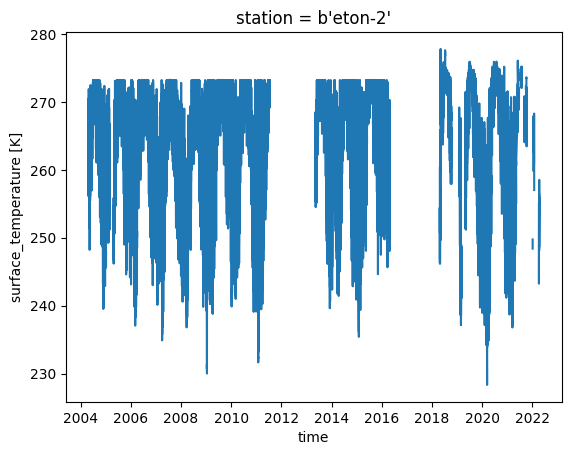

In [12]:
plt.figure()
eton.ts.plot()
plt.show()

## Test latest wsn query data

In [7]:
from wsn_client import query
import datetime, os
from matplotlib import pyplot
import numpy as np
import pandas as pd

start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 9, 1)
# Load data
name='sw-001'
var_oi = ['tmp_temperature', 'bme_hum', 'bme_pres', 'mb_distance', 'mlx_object']
df = query.query('postgresql',fields=var_oi, name=name,
                      time__gte=start, time__lte=end, limit=2000000000000)
## Formatting
# Replace Nones in empty lists by NaNs 
df = df.fillna(value=np.nan)
# Assign NaNs to -9999 values
df = df.replace('-9999',np.nan)
# Remove column with time as number
del df['time']
df.mb_distance = df.mb_distance.apply(lambda x: np.median(np.array(x)))
df.head()

,tmp_temperature,bme_hum,bme_pres,mb_distance,mlx_object
time,,,,,
2021-04-28 08:20:01,NaN,NaN,NaN,582.0,NaN
2021-04-28 08:40:01,-5.86,63.289997,1016.929993,2067.0,-9.830000
2021-04-28 09:20:01,-5.72,62.189999,1016.849976,514.0,-9.309999
2021-04-28 10:00:01,-5.72,67.750000,1016.419983,524.0,-10.190000
2021-04-28 10:40:01,-5.35,62.250000,1016.359985,497.0,-9.010000


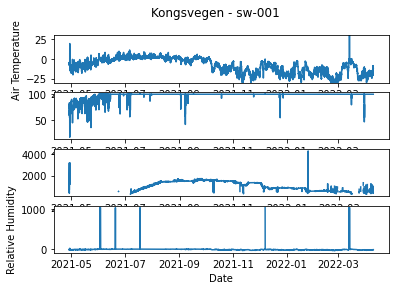

In [16]:
# Plot
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4)
fig.suptitle('Kongsvegen - sw-001')
ax1.plot(df.tmp_temperature.loc[df.tmp_temperature<100])
ax1.set(xlabel="Date", ylabel="Air Temperature", ylim=(-30,30))
ax2.plot(df.bme_hum)
ax3.plot(df.mb_distance)
ax4.plot(df.mlx_object)
pyplot.xlabel("Date")
pyplot.ylabel("Relative Humidity")
pyplot.show()

In [9]:
plt.plot(df.mb_distance)
plt.show()

## API FROST met.no

In [7]:
# Libraries needed (pandas is not standard and must be installed in Python)
import requests
import pandas as pd

# Insert your own client ID here
client_id = '95fb85a2-63af-4215-8bef-f8e8cb534d54'

In [51]:
# Define endpoint and parameters ##Check here https://frost.met.no/elementtable mean(wind_from_direction PT1H),mean(wind_speed PT1H)
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN99910', 
    'elements': 'sum(precipitation_amount PT12H)', #air_temperature,surface_snow_thickness,wind_from_direction,wind_speed 'mean(air_temperature PT1H),mean(surface_snow_thickness PT1H),sum(precipitation_amount PT1H)'
    'referencetime': '2021-05-01/2022-10-01',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
json = r.json()

In [52]:
# Check if the request worked, print out any errors
if r.status_code == 200:
    data = json['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % json['error']['message'])
    print('Reason: %s' % json['error']['reason'])

Data retrieved from frost.met.no!


In [53]:
## OLD!!! TOO SLOW!!! 
## This will return a Dataframe with all of the observations in a table format
#df = pd.DataFrame()
#for i in range(len(data)):
#    row = pd.DataFrame(data[i]['observations'])
#    row['referenceTime'] = data[i]['referenceTime']
#    row['sourceId'] = data[i]['sourceId']
#    df = pd.concat([df,row])
#
#df = df.reset_index()
data

[{'sourceId': 'SN99910:0',
  'referenceTime': '2021-05-01T06:00:00.000Z',
  'observations': [{'elementId': 'sum(precipitation_amount PT12H)',
    'value': -1,
    'unit': 'mm',
    'timeOffset': 'PT6H',
    'timeResolution': 'PT12H',
    'timeSeriesId': 0,
    'performanceCategory': 'C',
    'exposureCategory': '2',
    'qualityCode': 0}]},
 {'sourceId': 'SN99910:0',
  'referenceTime': '2021-05-01T18:00:00.000Z',
  'observations': [{'elementId': 'sum(precipitation_amount PT12H)',
    'value': -1,
    'unit': 'mm',
    'timeOffset': 'PT6H',
    'timeResolution': 'PT12H',
    'timeSeriesId': 0,
    'performanceCategory': 'C',
    'exposureCategory': '2',
    'qualityCode': 0}]},
 {'sourceId': 'SN99910:0',
  'referenceTime': '2021-05-02T06:00:00.000Z',
  'observations': [{'elementId': 'sum(precipitation_amount PT12H)',
    'value': -1,
    'unit': 'mm',
    'timeOffset': 'PT6H',
    'timeResolution': 'PT12H',
    'timeSeriesId': 0,
    'performanceCategory': 'C',
    'exposureCategory': '

In [54]:
df=pd.json_normalize(data,record_path ='observations',meta='referenceTime')
df

,elementId,value,unit,timeOffset,timeResolution,timeSeriesId,performanceCategory,exposureCategory,qualityCode,referenceTime
0,sum(precipitation_amount PT12H),-1.0,mm,PT6H,PT12H,0,C,2,0,2021-05-01T06:00:00.000Z
1,sum(precipitation_amount PT12H),-1.0,mm,PT6H,PT12H,0,C,2,0,2021-05-01T18:00:00.000Z
2,sum(precipitation_amount PT12H),-1.0,mm,PT6H,PT12H,0,C,2,0,2021-05-02T06:00:00.000Z
3,sum(precipitation_amount PT12H),-1.0,mm,PT6H,PT12H,0,C,2,0,2021-05-02T18:00:00.000Z
4,sum(precipitation_amount PT12H),-1.0,mm,PT6H,PT12H,0,C,2,0,2021-05-03T06:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...
1035,sum(precipitation_amount PT12H),0.2,mm,PT6H,PT12H,0,C,2,0,2022-09-28T18:00:00.000Z
1036,sum(precipitation_amount PT12H),0.2,mm,PT6H,PT12H,0,C,2,0,2022-09-29T06:00:00.000Z
1037,sum(precipitation_amount PT12H),2.1,mm,PT6H,PT12H,0,C,2,0,2022-09-29T18:00:00.000Z
1038,sum(precipitation_amount PT12H),2.4,mm,PT6H,PT12H,0,C,2,0,2022-09-30T06:00:00.000Z


In [55]:
# These additional columns will be kept
columns = ['referenceTime','elementId','value'] #,'unit','timeOffset'
df2 = df[columns].copy()
# Convert the time value to something Python understands
df2['referenceTime'] = pd.to_datetime(df2['referenceTime'])
#df2 = df2.set_index('referenceTime')

# Preview the result
df2.head()

,referenceTime,elementId,value
0,2021-05-01 06:00:00+00:00,sum(precipitation_amount PT12H),-1.0
1,2021-05-01 18:00:00+00:00,sum(precipitation_amount PT12H),-1.0
2,2021-05-02 06:00:00+00:00,sum(precipitation_amount PT12H),-1.0
3,2021-05-02 18:00:00+00:00,sum(precipitation_amount PT12H),-1.0
4,2021-05-03 06:00:00+00:00,sum(precipitation_amount PT12H),-1.0


In [56]:
df2=df2.pivot_table(index='referenceTime',columns='elementId',values='value')

<AxesSubplot:xlabel='referenceTime'>

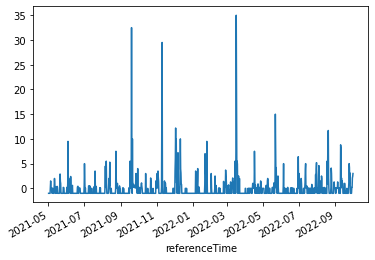

In [59]:
#df2['surface_snow_thickness'].plot()
#df2['air_temperature'].plot()
df2['sum(precipitation_amount PT12H)'].plot()